In [1]:
import pandas as pd
taula = pd.read_pickle('./data/processed/dataframe.pkl')

from listas import cat_var_ger, num_var_ger

In [2]:
from auxiliary_functions import test_indepe_plot, test_indepe_bin_plot, mitjana_i_std_num, comptatge_i_percentatge_cat 

In [3]:
AMB_PA = taula[taula["PA diagnosticada"] == 1.0]
AMB_PA_MECVV = taula[
    (taula["Dies entre primer ICD pneumònia i primer MECVV positiu"] < 30)]
SENSE_PA = taula[
           (taula["Dies entre primer ICD pneumònia i primer MECVV positiu"] > 30) &
           (taula['P diagnosticada'] == 1.0)]
TOTAL = taula

# Anàlisi descriptiva de les dades

### Comptatges i percentatges de variables categòriques per grup

In [4]:
llista_dfs = [('AMB_PA', AMB_PA), ('AMB_PA_MECVV', AMB_PA_MECVV), ('SENSE_PA', SENSE_PA), ('TOTAL', TOTAL)]

comptatge_i_percentatge_cat(llista_dfs, cat_var_ger)

+------------------------+--------------+-------+------------+--------------+
|        Columna         |  DataFrame   | Valor | Comptatges | Percentatges |
+------------------------+--------------+-------+------------+--------------+
|    Caigudes prèvies    |    AMB_PA    |  0.0  |     17     |    94.44%    |
|                        |              |  1.0  |     1      |    5.56%     |
|                        |              |       |            |              |
|    Caigudes prèvies    | AMB_PA_MECVV |  0.0  |     6      |   100.00%    |
|                        |              |       |            |              |
|    Caigudes prèvies    |   SENSE_PA   |  0.0  |     9      |    90.00%    |
|                        |              |  1.0  |     1      |    10.00%    |
|                        |              |       |            |              |
|    Caigudes prèvies    |    TOTAL     |  0.0  |     39     |    92.86%    |
|                        |              |  1.0  |     3      |  

### Mitjanes i desviacions estàndard de variables numèriques per grup

In [5]:
llista_dfs = [('AMB_PA', AMB_PA), ('AMB_PA_MECVV', AMB_PA_MECVV), ('SENSE_PA', SENSE_PA), ('TOTAL', TOTAL)]

mitjana_i_std_num(llista_dfs, num_var_ger)

+----------+--------------+---------+---------------------+
| Columna  |  DataFrame   | Mitjana | Desviació Estàndard |
+----------+--------------+---------+---------------------+
| Charlson |    AMB_PA    |  10.17  |        10.42        |
|          |              |         |                     |
| Charlson | AMB_PA_MECVV |  15.83  |        12.62        |
|          |              |         |                     |
| Charlson |   SENSE_PA   |  16.50  |        12.00        |
|          |              |         |                     |
| Charlson |    TOTAL     |  12.43  |        13.11        |
|          |              |         |                     |
+----------+--------------+---------+---------------------+


C:\Users\maria\PycharmProjects\practicum\auxiliary_functions.py:1110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col],


# Síndromes geriàtrics

## Index de Charlson

Comparació distributiva. Test d'independència. Test d'independència

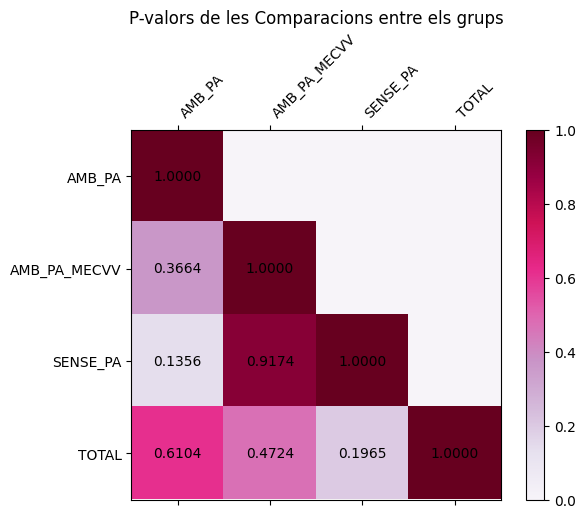

In [6]:
test_indepe_plot({'AMB_PA': AMB_PA['Charlson'], 'AMB_PA_MECVV': AMB_PA_MECVV['Charlson'], 'SENSE_PA': SENSE_PA['Charlson'], 'TOTAL': TOTAL['Charlson']})

## Caigudes prèvies

Comparació distributiva. Test d'independència. Test d'independència

In [7]:
test_indepe_bin_plot(taula, 'Caigudes prèvies')

AttributeError: 'DataFrame' object has no attribute 'unique'

## Deliris

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Deliris')

## Demència

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Demència')

## Síndrome depressiu

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Síndrome depressiu')

## Incontinència urinària

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Incont.uri')

## Incontinència fecal 

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Incont.fec')

## Úlceres de pressió

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Úlceres pressió')

## Immobilitat

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Immobilitat')

## Confusió

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Confusió')

## Osteoporosi

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Osteoporosi')

## Sarcopènia

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Sarcopènia')

## Trastorns del son

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Probl.son')

## Dolor crònic

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Dolor crònic')

## Iatrogènic

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Iatrogènic')

## Restrenyiment

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Restrenyiment')

# Historial mèdic/comorbiditats

## Malalties CV

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'CV')

## Malalties del cor

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Probl.cor')

## Malalties neurodegeneratives

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Neurodegeneratives')

## Diabetis mellitus

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'DM')

## Hepatopaties

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Hepatopaties')

## Neoplàsies

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Neoplàsies')

## Malaltia crònica renal (creatinina > 1.5mg/dL)

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Malaltia renal crònica')

## Fallida renal aguda (o insuficiència renal aguda)

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'ARF')

## Marejos/síncope/lipotímia/reacció vasovagal

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Marejos')

## VIH

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'VIH')

## Psicosi

#### Comparació distributiva. Test d'independència. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Psicosi')

## Deficiències nutricionals

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula, 'Def.nutri')